<a href="https://colab.research.google.com/github/surajbhala/PyCaret-HandsOn/blob/main/PyCaret_InsuranceDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 4.3MB/s 
     |████████████████████████████████| 2.0MB 35.2MB/s 
     |████████████████████████████████| 6.8MB 28.4MB/s 
     |████████████████████████████████| 256kB 54.6MB/s 
     |████████████████████████████████| 1.7MB 36.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 51.4MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 276kB 47.8MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 112kB 39.1MB/s 
     |████████████████████████████████| 1.4MB 25.7MB/s 
     |████████████████████████████████| 14.2MB 253kB/s 
     |████████████████████████████████| 645kB 32.9MB/s 
     |████████████████████████████████| 10.1MB 27.7MB/s 
     |████████████████████████████████| 81kB 8.5MB/

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pycaret

In [6]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


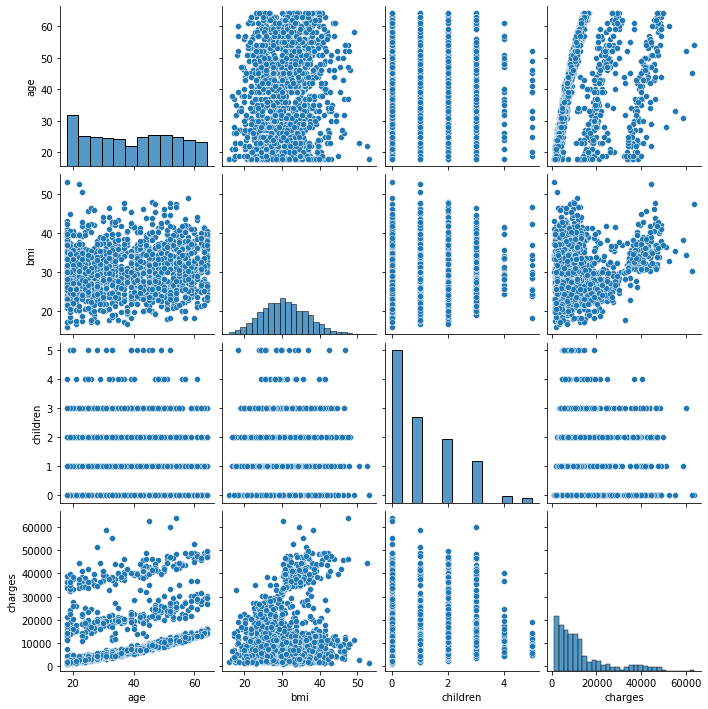

In [12]:
sns.pairplot(df)
plt.show()

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
int_cols = ['age', 'bmi', 'children','charges']

In [17]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(df[int_cols].values)

In [25]:
cov_mat  = np.cov(scaled_cols.T)
cov_mat 

array([[1.00074794, 0.10935361, 0.04250076, 0.29923183],
       [0.10935361, 1.00074794, 0.01276844, 0.19848932],
       [0.04250076, 0.01276844, 1.00074794, 0.06804909],
       [0.29923183, 0.19848932, 0.06804909, 1.00074794]])

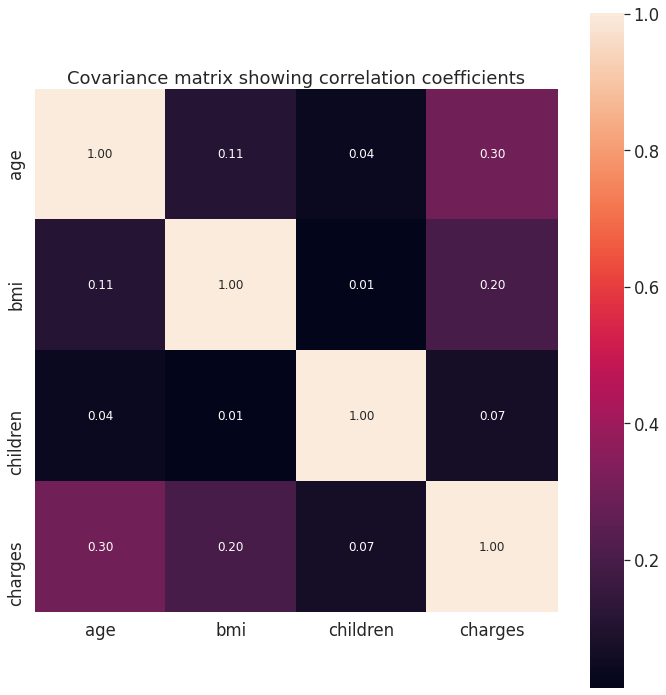

In [27]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=int_cols,
                 xticklabels=int_cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

### Looking at the data , no strong covariance is present between charges and any of the other numerical variables

In [29]:
from pycaret.regression import *

In [30]:
s = setup(df, target = 'charges', silent=True)

,Description,Value
0,session_id,2318
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [31]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2668.5074,2.301475e+07,4752.1234,0.8381,0.4238,0.3016,0.083
rf,Random Forest Regressor,2764.4039,2.537452e+07,4996.2311,0.8208,0.4465,0.3147,0.559
lightgbm,Light Gradient Boosting Machine,2977.7372,2.573150e+07,5030.4593,0.8188,0.5240,0.3616,0.093
ada,AdaBoost Regressor,4157.5749,2.836547e+07,5308.6131,0.8018,0.6174,0.7022,0.033
et,Extra Trees Regressor,2810.0469,2.897150e+07,5336.9626,0.7955,0.4692,0.3139,0.500
llar,Lasso Least Angle Regression,4244.6350,3.755820e+07,6102.6907,0.7379,0.5851,0.4436,0.016
ridge,Ridge Regression,4264.5440,3.758752e+07,6105.3823,0.7377,0.5856,0.4468,0.014
lasso,Lasso Regression,4252.0814,3.759328e+07,6105.7270,0.7376,0.5994,0.4444,0.014
br,Bayesian Ridge,4261.8922,3.759055e+07,6105.6037,0.7376,0.5871,0.4463,0.015
lr,Linear Regression,4251.9966,3.759730e+07,6106.0536,0.7375,0.6025,0.4443,0.274


In [32]:
# store the results, print and save
output_table_1 = pull()
output_table_1.to_csv('results.csv', index = False)

In [33]:
best_final = finalize_model(best)
save_model(best_final, 'pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [35]:
from pycaret.regression import load_model, predict_model
pipeline = load_model('pipeline')

Transformation Pipeline and Model Successfully Loaded


In [38]:
df_2 = pd.read_csv('/content/insurance_raw.csv')

In [39]:
output_table_1 = predict_model(pipeline, data = df_2)
output_table_1.to_csv('predictions.csv', index=False)

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [42]:
mean_squared_error(df['charges'],output_table_1['Label'])

14727222.622464055

In [43]:
r2_score(output_table_1['Label'],df['charges'])

0.8837083406682498